### Загрузим и обработаем датасет

In [1]:
from  load_data import Load_Process_Dataset

D = Load_Process_Dataset('adult')
D.start_load()

Start processing dataset adult from UCI.
Finish downloading dataset from https://archive.ics.uci.edu/static/public/2/adult.zip, data has been saved to data/adult.
Finish unzipping adult.
adult (32561, 15) (16281, 15) (32561, 15)
Numerical (32561, 6)
Categorical (32561, 8)
Processing and Saving adult Successfully!
adult
Total 48842
Train 32561
Test 16281
Num 6
Cat 9


### train VAE


#### params

In [2]:
LR = 1e-3
WD = 0
D_TOKEN = 4
TOKEN_BIAS = True

In [3]:
N_HEAD = 1
FACTOR = 32
NUM_LAYERS = 2

In [4]:
import torch
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

Device: cuda


In [5]:
from model_train.train_vae import VAE_main

vae_train = VAE_main(name = 'adult', LR = 1e-3, WD = 0, D_TOKEN = 4, N_HEAD = 1, FACTOR = 32, NUM_LAYERS = 2)

In [6]:
vae_train.tabsyn_vae_main(device = my_device, num_epochs = 4000)

No NaNs in numerical features, skipping


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


self.category_embeddings.weight.shape=torch.Size([104, 4])
self.category_embeddings.weight.shape=torch.Size([104, 4])


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch: 0, beta = 0.010000, Train MSE: 6.501733, Train CE:2.229884, Train KL:0.556422, Val MSE:4.587008, Val CE:2.243962, Train ACC:0.201909, Val ACC:0.200117
epoch: 100, beta = 0.010000, Train MSE: 0.010842, Train CE:0.040650, Train KL:4.033862, Val MSE:0.010622, Val CE:0.040855, Train ACC:0.994600, Val ACC:0.994083
epoch: 200, beta = 0.010000, Train MSE: 0.004661, Train CE:0.009507, Train KL:2.654603, Val MSE:0.004685, Val CE:0.009587, Train ACC:0.998629, Val ACC:0.998621
epoch: 300, beta = 0.007000, Train MSE: 0.002593, Train CE:0.004331, Train KL:2.322821, Val MSE:0.002534, Val CE:0.004617, Train ACC:0.999314, Val ACC:0.999338
epoch: 400, beta = 0.007000, Train MSE: 0.002056, Train CE:0.002441, Train KL:2.126722, Val MSE:0.001917, Val CE:0.002416, Train ACC:0.999657, Val ACC:0.999788
epoch: 500, beta = 0.002401, Train MSE: 0.000874, Train CE:0.001038, Train KL:2.315655, Val MSE:0.000883, Val CE:0.001087, Train ACC:0.999971, Val ACC:0.999973
Learning rate updated: 0.00095
epoch: 600,

KeyboardInterrupt: 

###train TabSyn

In [7]:
from model_train.train_tabsyn import tabsyn_main
tabsyn_main(my_device, 'adult', 600)

model
MLPDiffusion(
  (proj): Linear(in_features=60, out_features=1024, bias=True)
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=2048, bias=True)
    (1): SiLU()
    (2): Linear(in_features=2048, out_features=2048, bias=True)
    (3): SiLU()
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): SiLU()
    (6): Linear(in_features=1024, out_features=60, bias=True)
  )
  (map_noise): PositionalEmbedding()
  (time_embed): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): SiLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
  )
)
the number of parameters 10616892
Epoch:0, Loss:0.7840691921693468
Time:  5.210999488830566


###Генерируем синтетику

In [8]:
from generate_synthetic import sample_main
sample_main()

No NaNs in numerical features, skipping
(32561, 9)
Time: 16.816728830337524
Saving sampled data to synthetic/adult/synthetic.csv


### Сравнение на классификаторе

In [9]:
pip install prdc

In [2]:
from metrics.mle import MLE

Синтетика

In [3]:
dataname = 'adult'

train_path = f'synthetic/{dataname}/synthetic.csv'
test_path = f'synthetic/{dataname}/test.csv'
MLE(train_path, test_path, dataname, model = 'synt')

  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:47] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classificatio

Saving scores to  eval/mle/adult/synt.json


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:28:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Трушные

In [4]:
dataname = 'adult'
model = 'real'
train_path = f'synthetic/{dataname}/{model}.csv'
test_path = f'synthetic/{dataname}/test.csv'

MLE(train_path, test_path, dataname, model = 'real')

  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:28:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
  3%|▎         | 1/36 [00:00<00:07,  4.73it/s]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:28:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
  6%|▌         | 2/36 [00:00<00:08,  4.01it/s]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:28:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU 

Saving scores to  eval/mle/adult/real.json


In [5]:
import json
import pandas as pd
with open('/content/eval/mle/adult/synt.json', 'r') as myFile:
    synthetic = json.load(myFile)

In [6]:
with open('/content/eval/mle/adult/real.json', 'r') as myFile:
    real = json.load(myFile)

In [7]:
df_real = pd.DataFrame({key: value["XGBClassifier"] for key, value in real.items()})
df_synt = pd.DataFrame({key: value["XGBClassifier"] for key, value in synthetic.items()})

df_real = df_real.rename(index={key: f'{key}_real' for key in df_real.index})
df_synt = df_synt.rename(index={key: f'{key}_synt' for key in df_synt.index})

df = pd.concat([df_real, df_synt])
df.sort_index(inplace=True)

df

,best_f1_scores,best_weighted_scores,best_auroc_scores,best_acc_scores,best_avg_scores
accuracy_real,0.872305,0.872305,0.873165,0.872305,0.872305
accuracy_synt,0.235796,0.238253,0.236288,0.235796,0.236288
binary_f1_real,0.706397,0.706397,0.708868,0.706397,0.706397
binary_f1_synt,0.381487,0.374268,0.380839,0.381487,0.380839
roc_auc_real,0.925802,0.925802,0.927068,0.925802,0.925802
roc_auc_synt,0.267716,0.300066,0.333327,0.267716,0.333327
weighted_f1_real,0.756480,0.756480,0.758488,0.756480,0.756480
weighted_f1_synt,0.291446,0.292160,0.291745,0.291446,0.291745


### Alpha Precision and Beta Recall

In [8]:
pip install synthcity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchtext to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is 

In [1]:
from metrics.alpha_beta import Alpha_Beta
Alpha_Beta()

[KeOps] Compiling cuda jit compiler engine ... OK
[pyKeOps] Compiling nvrtc binder for python ... OK
=========== All Features ===========
Data shape:  (32561, 110)
alpha precision: 0.063690, beta recall: 0.002561


### Density estimation of single column and pair-wise correlation

In [2]:
pip install sdmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import os

import json

# Metrics
from sdmetrics.reports.single_table import QualityReport, DiagnosticReport


def reorder(real_data, syn_data, info):
    num_col_idx = info['num_col_idx']
    cat_col_idx = info['cat_col_idx']
    target_col_idx = info['target_col_idx']

    task_type = info['task_type']
    if task_type == 'regression':
        num_col_idx += target_col_idx
    else:
        cat_col_idx += target_col_idx

    real_num_data = real_data[num_col_idx]
    real_cat_data = real_data[cat_col_idx]

    new_real_data = pd.concat([real_num_data, real_cat_data], axis=1)
    new_real_data.columns = range(len(new_real_data.columns))

    syn_num_data = syn_data[num_col_idx]
    syn_cat_data = syn_data[cat_col_idx]

    new_syn_data = pd.concat([syn_num_data, syn_cat_data], axis=1)
    new_syn_data.columns = range(len(new_syn_data.columns))


    metadata = info['metadata']

    columns = metadata['columns']
    metadata['columns'] = {}

    inverse_idx_mapping = info['inverse_idx_mapping']


    for i in range(len(new_real_data.columns)):
        if i < len(num_col_idx):
            metadata['columns'][i] = columns[num_col_idx[i]]
        else:
            metadata['columns'][i] = columns[cat_col_idx[i-len(num_col_idx)]]


    return new_real_data, new_syn_data, metadata


In [4]:
dataname = 'adult'
model = 'model'

syn_path = 'synthetic/adult/synthetic.csv'

real_path = f'synthetic/{dataname}/real.csv'

data_dir = f'data/{dataname}'
print(syn_path)

with open(f'{data_dir}/info.json', 'r') as f:
    info = json.load(f)

syn_data = pd.read_csv(syn_path)
real_data = pd.read_csv(real_path)

save_dir = f'eval/density/{dataname}/{model}'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

real_data.columns = range(len(real_data.columns))
syn_data.columns = range(len(syn_data.columns))

metadata = info['metadata']
metadata['columns'] = {int(key): value for key, value in metadata['columns'].items()}

new_real_data, new_syn_data, metadata = reorder(real_data, syn_data, info)

qual_report = QualityReport()
qual_report.generate(new_real_data, new_syn_data, metadata)

diag_report = DiagnosticReport()
diag_report.generate(new_real_data, new_syn_data, metadata)

quality =  qual_report.get_properties()
diag = diag_report.get_properties()

Shape = quality['Score'][0]
Trend = quality['Score'][1]

with open(f'{save_dir}/quality.txt', 'w') as f:
    f.write(f'{Shape}\n')
    f.write(f'{Trend}\n')

Quality = (Shape + Trend) / 2

# shapes = qual_report.get_details(property_name='Column Shapes')
# trends = qual_report.get_details(property_name='Column Pair Trends')
# coverages = diag_report.get_details('Coverage')


# shapes.to_csv(f'{save_dir}/shape.csv')
# trends.to_csv(f'{save_dir}/trend.csv')
# coverages.to_csv(f'{save_dir}/coverage.csv')

synthetic/adult/synthetic.csv
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 15/15 [00:00<00:00, 106.94it/s]|
Column Shapes Score: 47.07%

(2/2) Evaluating Column Pair Trends: |██████████| 105/105 [00:02<00:00, 49.37it/s]|
Column Pair Trends Score: 37.53%

Overall Score (Average): 42.3%

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 15/15 [00:00<00:00, 109.78it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 258.43it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [5]:
shapes = qual_report.get_details(property_name='Column Shapes')
trends = qual_report.get_details(property_name='Column Pair Trends')
coverages_srt = diag_report.get_details('Data Structure')
coverages_val = diag_report.get_details('Data Validity')

In [6]:
qual_report.get_properties()

,Property,Score
0,Column Shapes,0.470717
1,Column Pair Trends,0.375305


In [31]:
pip install kaleido
pip install plotly==5.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00


In [1]:
import kaleido
import plotly

kaleido.__version__, plotly.__version__

('0.2.1', '5.5.0')

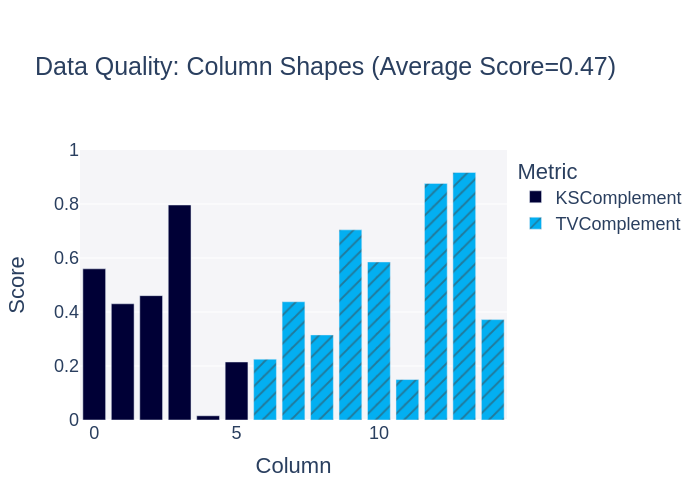

In [7]:
fig = qual_report.get_visualization(property_name='Column Shapes')
# fig.show()
fig.show(renderer = 'png')

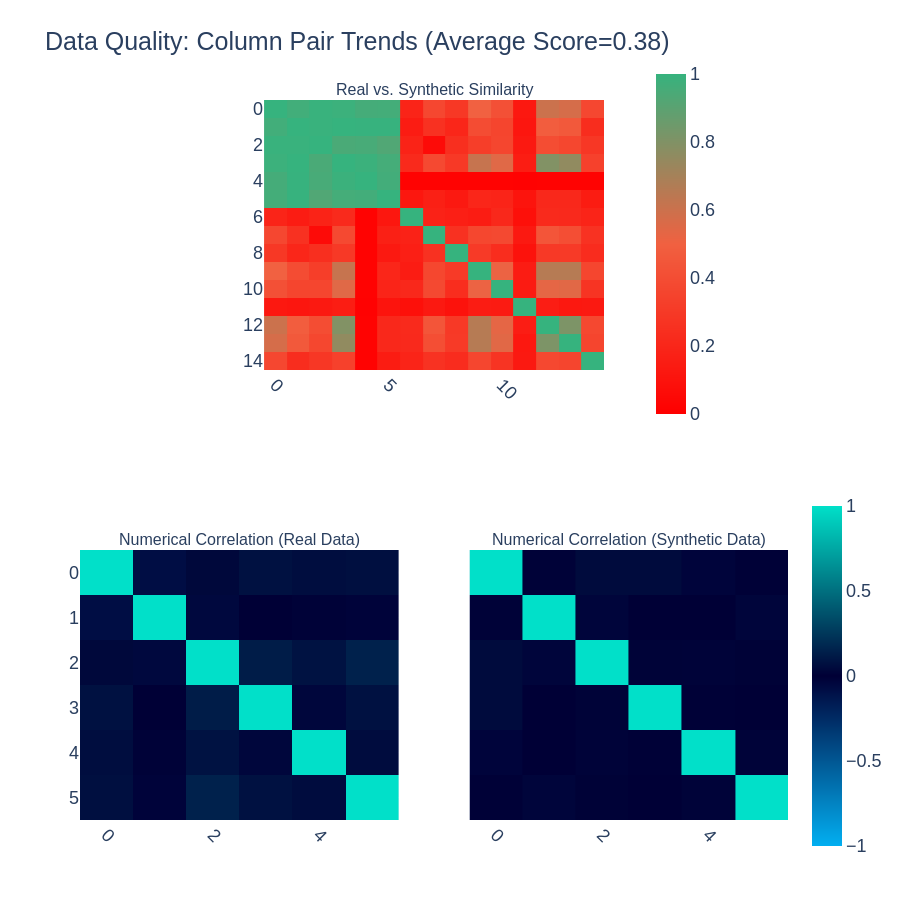

In [8]:
fig = qual_report.get_visualization(property_name='Column Pair Trends')
fig.show(renderer = 'png')

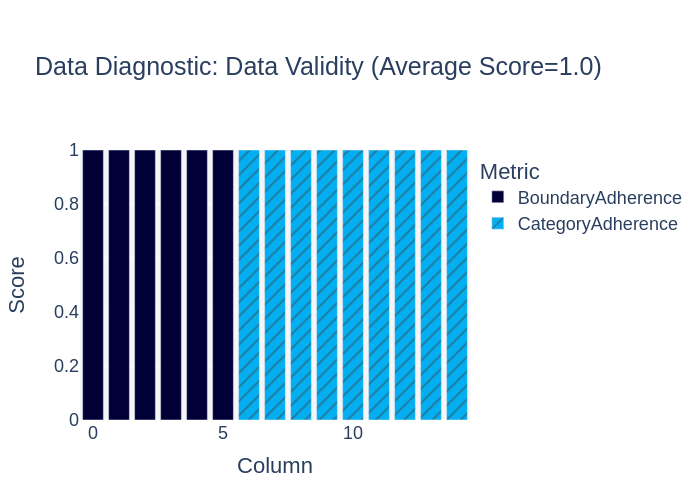

In [9]:
fig = diag_report.get_visualization(property_name = 'Data Validity')
fig.show(renderer = 'png')

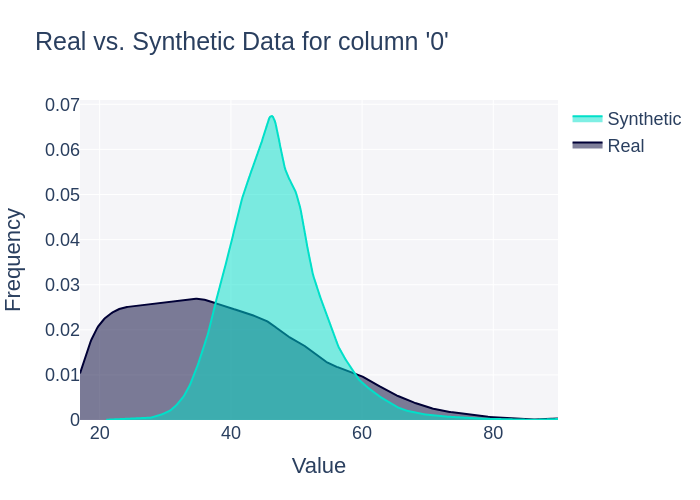

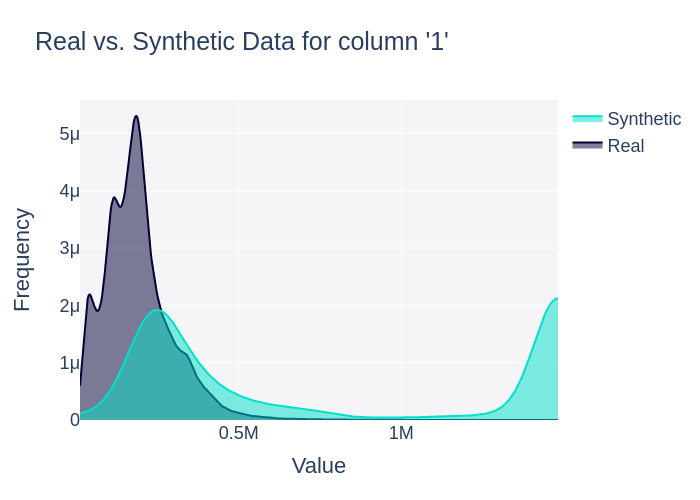

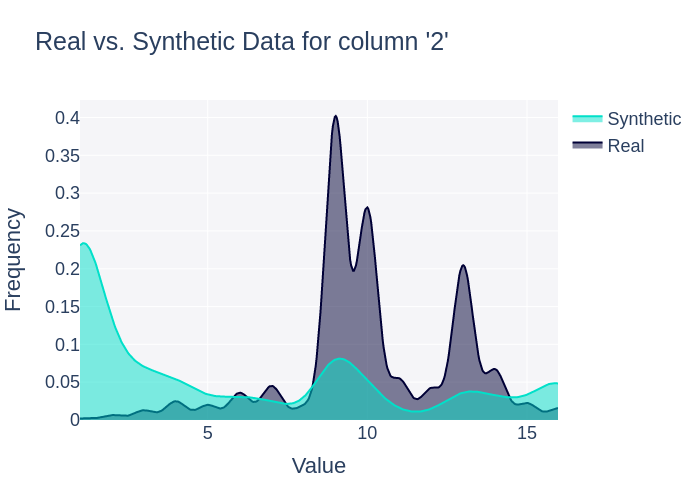

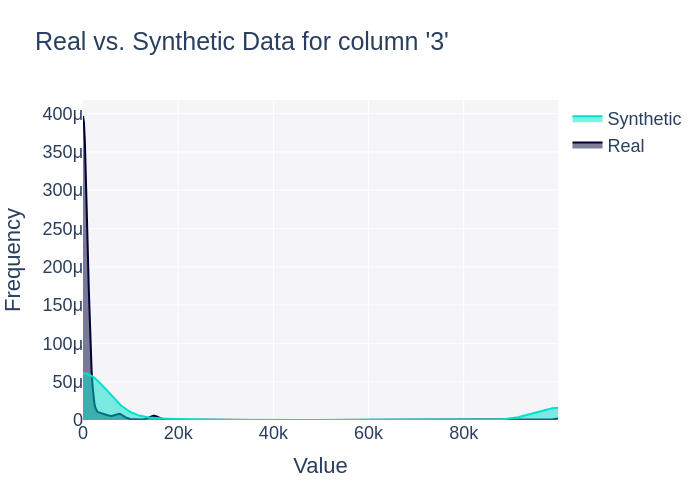

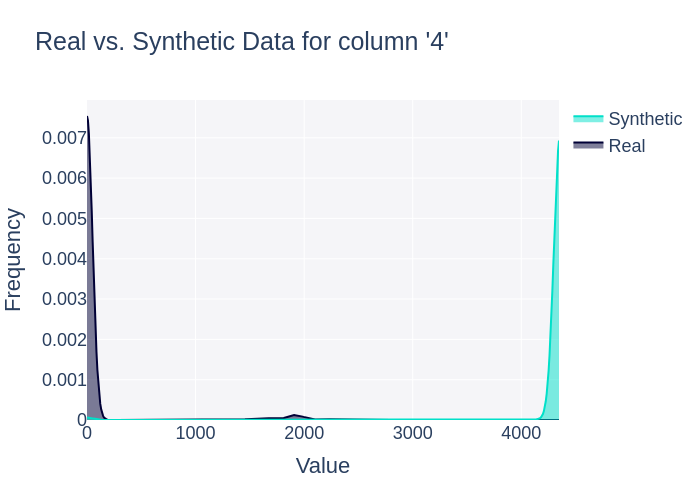

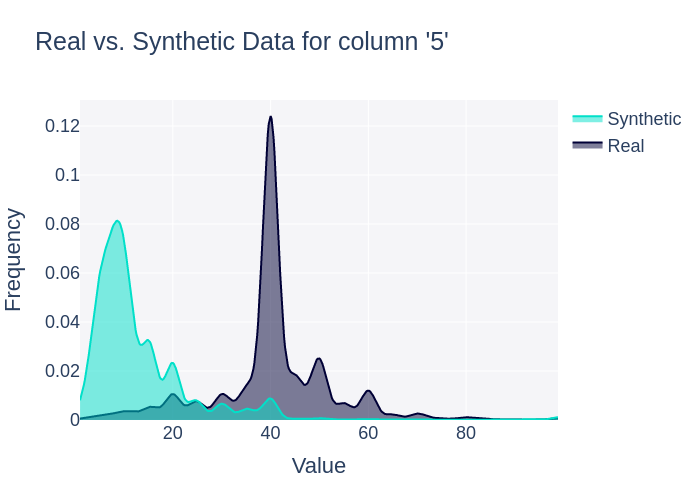

In [10]:
from sdmetrics.visualization import get_column_plot
for i in range(0, 6):
    fig = get_column_plot(
        real_data=new_real_data,
        synthetic_data=new_syn_data,
        column_name= i,
        plot_type='distplot'
    )

    fig.show(renderer = 'png')

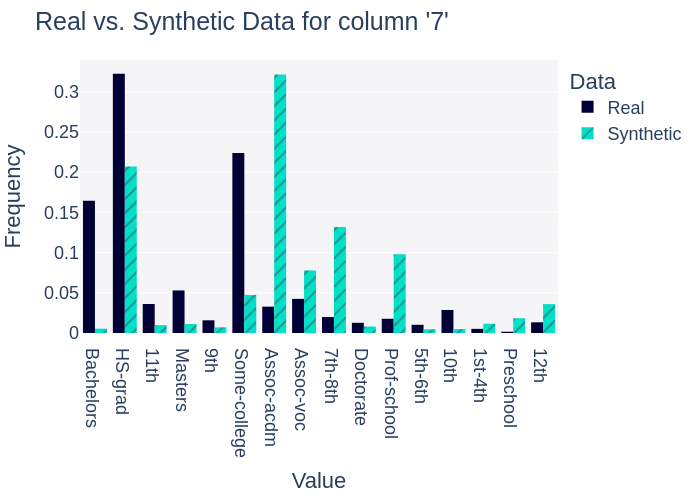

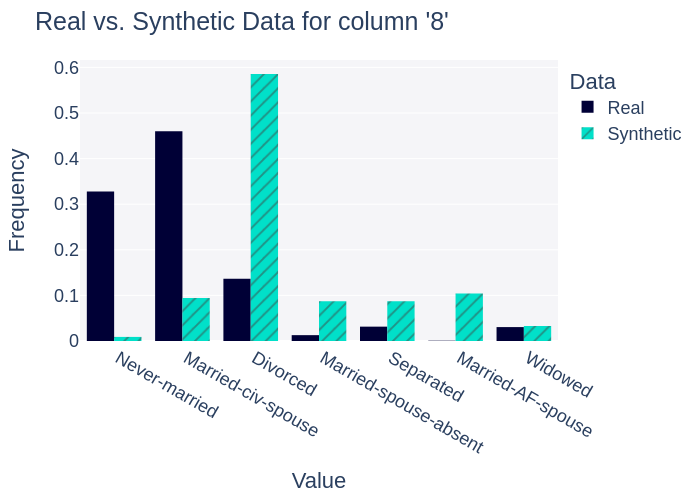

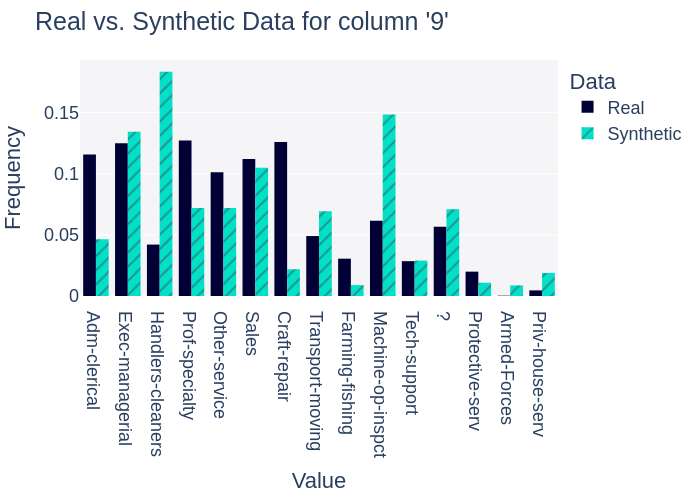

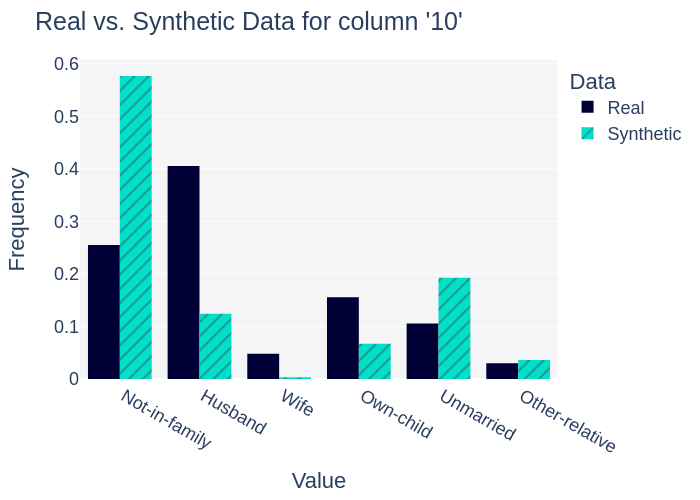

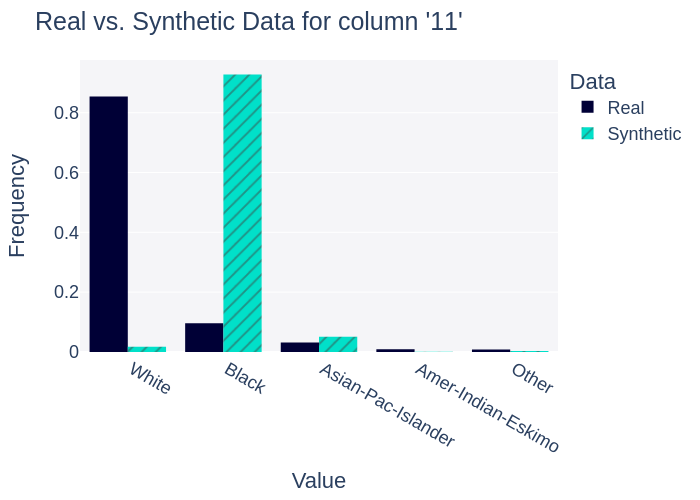

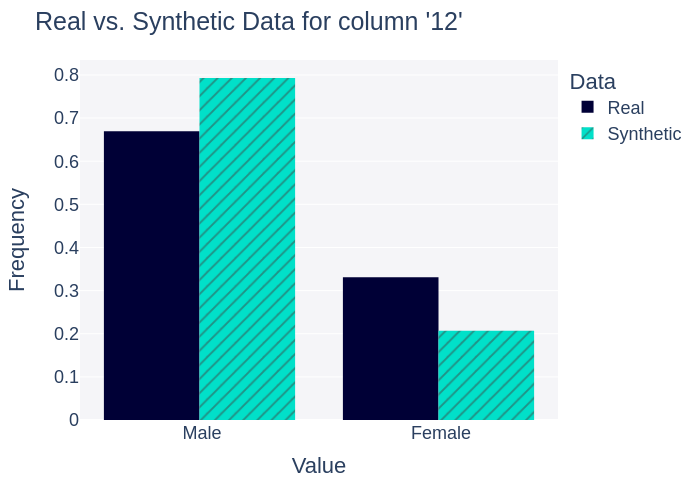

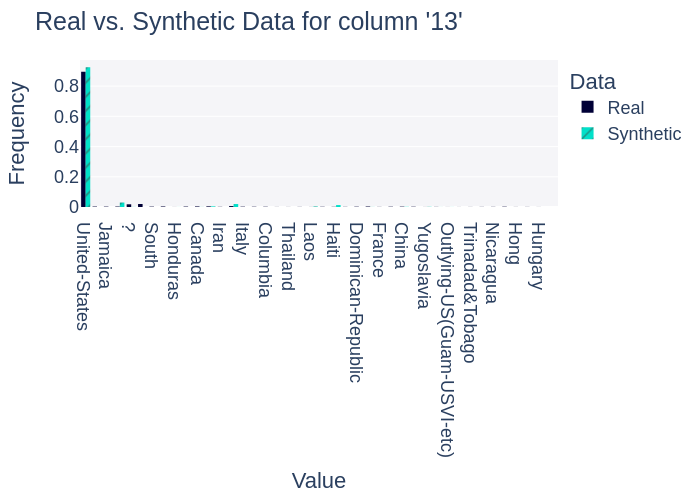

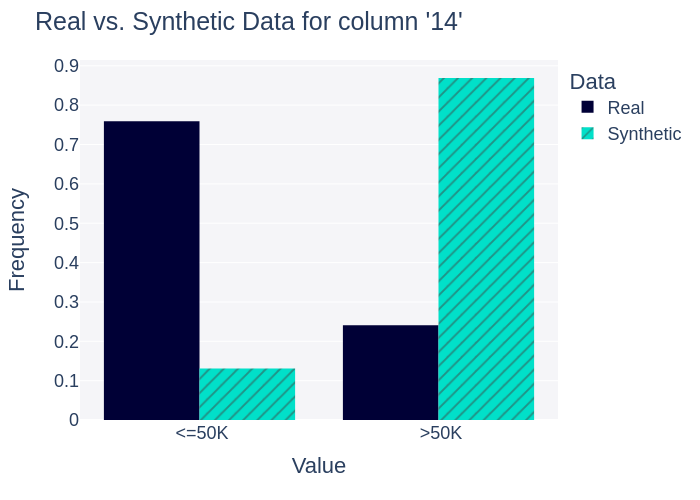

In [11]:
for i in range(7, 15):
    fig = get_column_plot(
        real_data=new_real_data,
        synthetic_data=new_syn_data,
        column_name= i,
        plot_type='bar'
    )

    fig.show(renderer = 'png')

### Pricavy protection: Distance to Closest Record (DCR)

In [ ]:
from metrics.dcr import DCR
DCR()